In [2]:
import numpy as np 
from helpers import * 
from implementations import *
from utilities import *
import matplotlib.pyplot as plt

In [4]:
# hyperparameter tuning with only a part of the dataset
MAX_ROWS = 10000

x_data = np.genfromtxt('data/dataset/x_train.csv', delimiter=",", skip_header=1,  max_rows=MAX_ROWS)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1,  max_rows=MAX_ROWS)

In [5]:

# x_data = reduced_data(x_data)  # remove sparse features

x_data = clean_X_0(x_data)  # replace nan with zero add bias column
y_data = clean_Y(y_data)

x_train, x_test, y_train, y_test = split_data(x_data, y_data, 0.8)

In [3]:
# comparison balanced and unbalanced data

N, D = x_train.shape
initial_w = np.random.rand(D)

w, loss = logistic_regression(y_train.reshape(-1, 1), x_train, initial_w.reshape(-1, 1), 10000, 0.01)
pred = predict_logistic(x_test, w)
print(f'unbalanced data, accuracy={np.sum(pred == y_test) / len(y_test)} f1-score={compute_f1(y_test, pred)}')

initial_w = np.random.rand(D)
x_data, y_data = balance_dataset(x_train, y_train)  # create balaced dataset with oversampling

w, loss = logistic_regression(y_data.reshape(-1, 1), x_data, initial_w.reshape(-1, 1), 10000, 0.01)
pred = predict_logistic(x_test, w)
print(f'balanced data, accuracy={np.sum(pred == y_test) / len(y_test)} f1-score={compute_f1(y_test, pred)}')


# with maxrow = 100k unbalanced is better than balanced


/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


unbalanced data, accuracy=0.5895 f1-score=0.2502283105022831
balanced data, accuracy=0.6015 f1-score=0.2708142726440988


In [6]:
# hyperparamter tuning

initial_w = np.random.rand(x_data.shape[1])

best_lambda, best_gamma = hyperparameter_tuning(x_data, y_data , reg_logistic_regression,lambdas= [0, 1e-4, 1e-5], 
                            gammas=[0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], model_params={'initial_w': initial_w ,'max_iters': 10000})

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


 lambda= 0 gamma= 0.01 , CV accuracy = 0.9074, f1_score = 0.2911
 lambda= 0.0001 gamma= 0.01 , CV accuracy = 0.9058, f1_score = 0.2656
 lambda= 1e-05 gamma= 0.01 , CV accuracy = 0.9059, f1_score = 0.2732
 lambda= 0 gamma= 0.05 , CV accuracy = 0.9099, f1_score = 0.2877
 lambda= 0.0001 gamma= 0.05 , CV accuracy = 0.9094, f1_score = 0.2983
 lambda= 1e-05 gamma= 0.05 , CV accuracy = 0.9101, f1_score = 0.2832
 lambda= 0 gamma= 0.1 , CV accuracy = 0.9096, f1_score = 0.3013
 lambda= 0.0001 gamma= 0.1 , CV accuracy = 0.9081, f1_score = 0.2759
 lambda= 1e-05 gamma= 0.1 , CV accuracy = 0.9101, f1_score = 0.2978
 lambda= 0 gamma= 0.15 , CV accuracy = 0.9078, f1_score = 0.2952
 lambda= 0.0001 gamma= 0.15 , CV accuracy = 0.9105, f1_score = 0.2873
 lambda= 1e-05 gamma= 0.15 , CV accuracy = 0.9075, f1_score = 0.2757
 lambda= 0 gamma= 0.2 , CV accuracy = 0.9085, f1_score = 0.2938
 lambda= 0.0001 gamma= 0.2 , CV accuracy = 0.9080, f1_score = 0.2920
 lambda= 1e-05 gamma= 0.2 , CV accuracy = 0.9112, f1_s

(0.0001, 0.25)

[[0.2        0.34841629]
 [0.21       0.3364486 ]
 [0.22       0.33415233]
 [0.23       0.33924051]
 [0.24       0.33246753]
 [0.25       0.33952255]
 [0.26       0.34501348]
 [0.27       0.34903047]
 [0.28       0.35492958]
 [0.29       0.36416185]
 [0.3        0.35882353]
 [0.31       0.35435435]
 [0.32       0.35474006]
 [0.33       0.35625   ]
 [0.34       0.34920635]
 [0.35       0.33663366]
 [0.36       0.33670034]
 [0.37       0.33220339]
 [0.38       0.33217993]
 [0.39       0.33215548]
 [0.4        0.33451957]
 [0.41       0.3381295 ]
 [0.42       0.33454545]
 [0.43       0.33948339]
 [0.44       0.33962264]
 [0.45       0.32061069]
 [0.46       0.31496063]
 [0.47       0.31020408]
 [0.48       0.31147541]
 [0.49       0.29411765]
 [0.5        0.27966102]
 [0.51       0.26495726]
 [0.52       0.26839827]
 [0.53       0.26315789]
 [0.54       0.26548673]
 [0.55       0.25112108]
 [0.56       0.23636364]
 [0.57       0.2293578 ]
 [0.58       0.22119816]
 [0.59       0.20465116]]

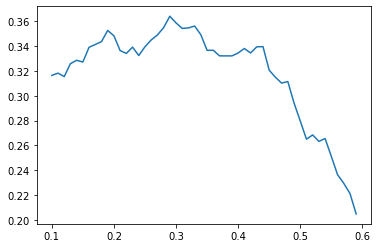

In [7]:
# choosing the best threshold, especially relevant here as dataset is unbalanced

initial_w = np.random.rand(x_train.shape[1])
# train with best hyperparameter found above
w, loss = reg_logistic_regression(y_train.reshape(-1, 1), x_train, 1e-05, initial_w.reshape(-1, 1), 10000, 0.25)

f1_scores = []
for threshold in np.arange(0.1, 0.6, 0.01).tolist(): 
    y_pred = (sigmoid(x_test @ w) >= threshold).flatten() 
    f1_scores.append([threshold, compute_f1(y_test, y_pred)])

best_threshold = max(f1_scores, key=lambda x: x[1])
f1_scores = np.array(f1_scores)
plt.plot(f1_scores[:, 0], f1_scores[:, 1])

In [8]:

# load dataset for final training
x_data = np.genfromtxt('data/dataset/x_train.csv', delimiter=",", skip_header=1)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1)
x_test = np.genfromtxt('data/dataset/x_test.csv', delimiter=",", skip_header=1)

# clean data
x_test_clean = clean_X_0(x_test)
y_data = clean_Y(y_data)
x_data = clean_X_0(x_data)

initial_w = np.random.rand(x_data.shape[1])

# train with optimal hyperparameters
w, loss = reg_logistic_regression(y_data.reshape(-1, 1), x_data, 1e-5, initial_w.reshape(-1, 1), 10000, 0.25)  # replace with best lambda, gamma

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


In [16]:
# predict with optimal threshold
y_pred = (sigmoid(x_test_clean @ w) >= 0.2).flatten()  # replace best threshold
y_pred = np.where(y_pred, 1, -1)

create_csv_submission(x_test[:, 0], y_pred, 'prediction.csv')

((y_pred == 1).sum() / len(y_pred)) * 100

13.548304519149015